# Introduction
----

This notebook is intended as an introduction to making nice looking plots with `python` and `matplotlib`. Some of what I've written here is my opinion, but most is rooted in sound design principles.

## Preliminaries

Before you can make plots, you have to import the plotting library. For largely historical reasons, `matplotlib` has three separate interfaces; I regularly use two of them. For most simple plots, you'll probably want to stick to the `pyplot` interface, but if you need something a little more specialized, you may need to use the object oriented interface directly.  As a consequence, I usually import both `pyplot` (naming it `plt` is standard) and the overall `matplotlib` module.

Additionally, I'm importing `numpy` to generate the data we're going to plot.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

/Users/cmckay/anaconda/envs/PHYS381/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


The first thing you can do to improve the look of your plots is make sure you're using the most up-to-date version of `matplotlib`. Version 1.5 introduced style sheets, and version 2 changed the default styles and color palettes.

In [2]:
mpl.__version__

'2.1.2'

If you're working in a jupyter notebook, the following line arranges things so that the plots appear as inline elements in the notebook.

In [3]:
%matplotlib inline

The rest of this notebook is organized as follows:
1. A discussion of the syntax of the most useful plot types
2. Instructions for the handful of annotations that ought to appear on *every* plot
3. Some information about applying different, consistent styles to your plots
4. Refinements, tips, and tricks
5. Some complete examples

Since this is an interactive notebook, you can make changes to try things out. You can also get detailed help about any function, including a moderately complete list of available arguments and default behavior.  Example:

In [4]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

# I. Plot types
---

The specifics of your work will typically limit the number of kinds of plots you prepare on a regular basis. Listed below are the ones that crop up most frequently in physics, listed more or less in order of descending frequency.

## A. Line Plot

The foundation.  Most appropriate when you're plotting a function (as opposed to measured data). First I'll make a range for `x`, and a function of `x` on that range.

In [5]:
# the syntax here is: linearly spaced points from 0 to 10; give me 100 of them.
x = np.linspace(0, 10, 100)

# numpy's sin function works seamlessly on numpy arrays, as returned by linspace
y = np.sin(x)

The simplest line plot actually just requires the `y` data, but you almost always want to include `x`, as well. The function returns an `Axis` object which I usually capture for later use, but that isn't absolutely necessary.

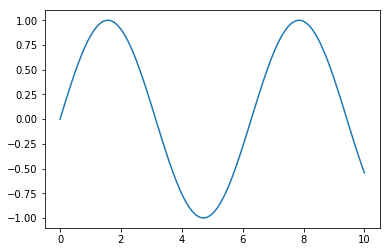

In [6]:
ax = plt.plot(x,y)

The first layer of complexity you can add to this is to also include a format string. This allows for some (limited) control of the color, symbol, and connectedness of the line. Here I'm asking for circles connected by a solid line in the default color...

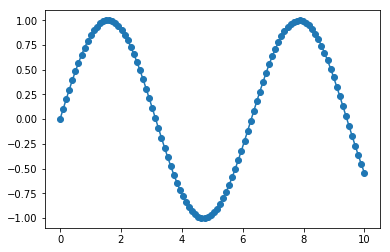

In [7]:
ax = plt.plot(x, y, 'o-')

But I could just as easily ask for red thin diamonds connected by dots, or any of a host of other combinations.

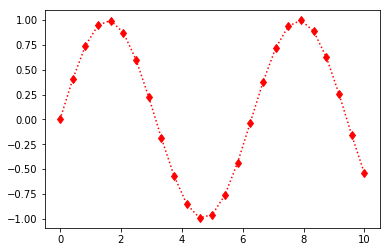

In [8]:
# lower resolution to show off the line style better
x = np.linspace(0, 10, 25)
y = np.sin(x)

ax = plt.plot(x, y, 'rd:')

The [full list of markers](https://matplotlib.org/api/markers_api.html) includes instructions for using arbitrary LaTeX symbols, or even how to specify your own markers for the truly ambitious.

Within this format string, line styles are limited to solid ('-'), dashed ('--'), dash-dot ('-.'), or dotted (':'). We'll cover further modifications in the [Refinements](#Refinements) section below.

Adding markers is appropriate if there are points in the function that are important, but if you're plotting discrete measured data, you probably want a scatter plot.

## B. Scatter Plot

Scatter plots are ideal for plotting discrete measurements. To simulate this, I'll add some random noise to our sine function. 

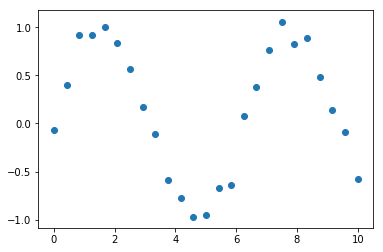

In [9]:
npoints = 25
x = np.linspace(0, 10, npoints)
noise = 0.1*np.random.randn(npoints)
y = np.sin(x) + noise

ax = plt.scatter(x,y)

Strictly speaking, you can do this with `plot` by setting a marker and no line (in fact, this is faster, and a better approach if your markers are all uniform). However, `plot` won't let you change the markers' sizes and colors, and `scatter` will. To do that, you can include an array (of the same shape as `x` and `y`) of sizes and/or colors. Sizes go first if you don't use keyword arguments, but if you do, the sizes are called `s` and the colors are called `c`.

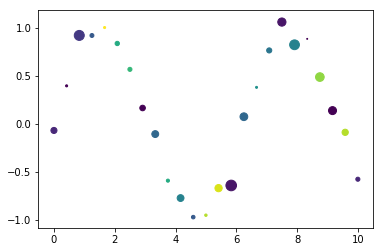

In [10]:
ax = plt.scatter(x,y, s=np.abs(noise)*550, c=np.random.randint(20, size=npoints))

Colors will be dealt with in more detail below.

You'll often want to plot both a scatter and a plot on the same set of axes (to compare data to your model of it, for example). There's more than one way to do this, but if you're using the `pyplot` interface, you just have to issue subsequent commands, thus:

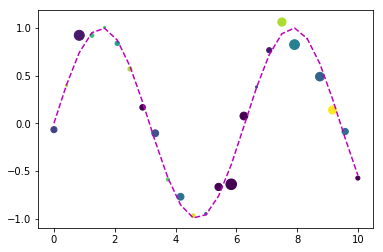

In [11]:
plt.scatter(x,y, s=np.abs(noise)*550, c=np.random.randint(20, size=npoints))
plt.plot(x, np.sin(x), 'm--');

(The trailing semicolon supresses some output that looks untidy to me).

The other major thing you're likely to need on a scatter plot is error bars. They are covered in detail [below](#Errorbars).

## C. Distribution (histogram/kde)

* **Note:** If you're plotting distributions, you should probably be using `seaborn`'s `distplot` rather than anything in vanilla `matplotlib`. [See below.](#distplot)

If you're displaying counts of things, you probably want a histogram (or something like it). Rather than generate random sample data for this type of plot, I thought I'd use some real data, namely, the number of students registered for classes at Marietta College in Fall of 2016. This comes right off of the College website (with a little bit of modification I've documented in another notebook).

In [12]:
import pandas as pd

In [14]:
fl2016 = pd.read_pickle('classes.pkl')
fl2016.head(7)

Description  Credit  \
Prefix Number Sect                                                              
ACCT   201    20    Intro to Mngt AcctRecommended Prerequisite:MSA...     3.0   
       202    01    Intro. to Fin. Acct.Open to students who have ...     3.0   
       301    01       Interm. Acct. ITHMS 103 T/TH 09:30AM - 10:45AM     3.0   
       302    01     Interm. Acct. IITHMS 103 M/W/F 11:00AM - 11:50AM     3.0   
       420    01    Federal Income TaxTHMS 110 M/W/F 08:00AM - 08:...     3.0   
ART    101    01    Drawing IHFAC 301A M/W 10:00AM - 11:50AMHFAC 3...     3.0   
              02    Drawing IFF Only HFAC 301A M/W 10:00AM - 11:50...     3.0   

                           Instructor(s)  Cap  Used  Avail  Wait cognates  \
Prefix Number Sect                                                          
ACCT   201    20    Depergola, Joseph S.   45    38      7     0            
       202    01       Johnson, Grace F.   30    13     17     0            
       301    01       Johnson, Grace F.   24    16      8     0            
       302    01      Ankrom, Douglas G.   24    15      9     0            
       420    01       Marra, Michele L.   24    17      7     0            
ART    101    01          Nash, Merri B.   11    12     -1     0        R   
              02          Nash, Merri B.    7     7      0     0        R   

                   prereqs  
Prefix Number Sect          
ACCT   201    20       PRE  
       202    01       PRE  
       301    01       PRE  
       302    01       PRE  
       420    01      None  
ART    101    01      None  
              02      None

We'll focus on the number of students enrolled in each class for now. The full list looks like this:

In [15]:
filledseats = fl2016['Used'].values
filledseats

array([38, 13, 16, 15, 17, 12,  7, 12,  6,  9,  7, 11, 12,  8, 23, 23, 23,
       23, 19, 19, 19, 15, 15, 19, 19, 18, 18, 18, 18,  7,  7, 17, 17, 29,
       14, 15,  6, 12, 12, 11,  0,  9,  5, 11,  1, 47, 47, 44, 44, 10, 18,
       21, 21, 21, 21, 23, 23, 24, 24,  9, 19, 22, 12, 10,  6,  9,  9,  0,
        0,  3, 10,  3,  8,  6,  0, 10, 10,  8, 17, 18, 20, 15, 19, 20, 20,
       20, 10, 16, 19,  7, 20, 16,  7,  0, 19, 21,  8,  8, 22, 21, 22, 13,
       10,  6,  5, 30, 41,  0, 25, 15,  9, 32, 32,  1,  0,  1,  1,  1,  0,
        5,  2, 10,  1, 11,  2, 11,  6,  8, 14,  0, 24,  2,  2,  0, 15,  2,
        9,  6,  1,  7,  7,  7,  2,  2,  2,  1,  0,  2,  1,  3,  1,  1,  1,
        0, 23,  0, 23, 24, 33, 37, 35, 11, 34, 27, 12,  0, 24,  0, 21, 22,
       17, 10,  5,  4,  9,  9,  6,  6, 11,  7, 23, 24, 15,  3, 18,  6, 14,
       11,  9, 14, 16,  9, 20, 17, 22, 16, 10,  9, 18, 19, 22, 35, 30, 29,
       28, 31, 38,  0, 42, 13, 24, 26, 15, 21, 12, 10, 25,  0, 13,  0, 14,
       13, 15, 12, 15, 14

The built-in histogram function returns the counts in each bin and the bin boundaries in addition to making the plot.

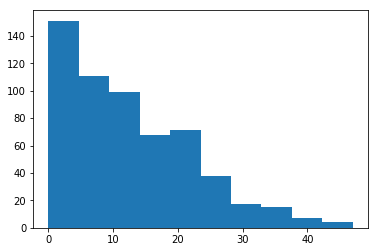

In [16]:
counts, bins, patches = plt.hist(filledseats)

In [17]:
print(counts)

[151. 111.  99.  68.  71.  38.  17.  15.   7.   4.]


In [18]:
print(bins)

[ 0.   4.7  9.4 14.1 18.8 23.5 28.2 32.9 37.6 42.3 47. ]


You can ask for a specific number of bins...

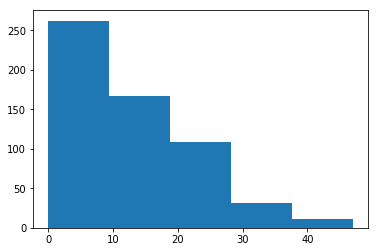

In [19]:
counts, bins, patches = plt.hist(filledseats, bins=5)

Or specify the bin boundaries. If you specify boundaries, you can leave out data on either end, and your bins don't have to be equal in size (though both of these things can dramatically affect the quality of your analysis, so you should only do so if you know what you're doing).

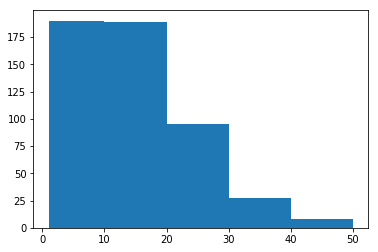

In [20]:
counts, bins, patches = plt.hist(filledseats, bins=[1,10,20,30,40,50])

I think histograms are easier to read if there's some kind of visual relief between the bars. You can accomplish this via the relative width (`rwidth`) argument. One problem with this approach is that it obfuscates slightly where the bin boundaries are, and that can affect your interpretation.

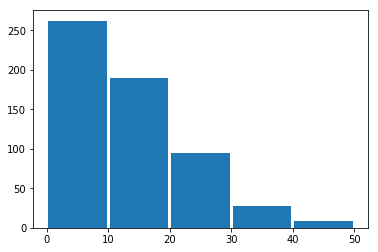

In [21]:
counts, bins, patches = plt.hist(filledseats, bins=[0,10,20,30,40,50], rwidth=0.95)

If your preferences go the other way, you can change the histogram type to be an unfilled step curve. This argument will also allow for stacked histograms of multiple data sets.

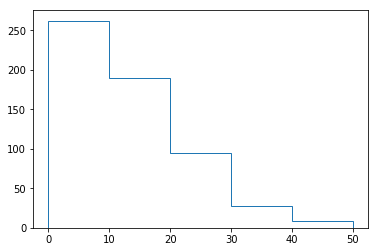

In [22]:
counts, bins, patches = plt.hist(filledseats, bins=[0,10,20,30,40,50], histtype='step')

One of the difficulties with histograms is that bin size and placement can affect your results, sometimes significantly. (For what I think is a very readable discussion of this problem [read this post](http://www.mglerner.com/blog/?p=28).)

The solution? Something called a Kernel Density Estimator. Basically, it's a continuous estimate of the underlying distribution. Jake Van der Plas [has written](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/) about KDEs in python with more detail than you probably care to read. The upshot: `matplotlib` doesn't have a built-in kde plot, so you have to use one of the three or four alternatives in other libraries to calculate the kde, and then plot it with the regular `plot` function.

For a nicer alternative, check out [distplot](#distplot) from seaborn.

## D. Contour and filled contour

For 2d scalar fields, contour and filled contour plots are a relatively standard approach. 

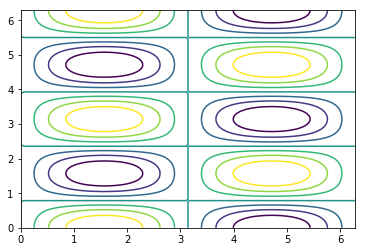

In [23]:
x = np.linspace(0,2*np.pi,100)
y = np.linspace(0,2*np.pi,100)

xx, yy = np.meshgrid(x,y)
z = np.sin(xx)*np.cos(2*yy)

plt.contour(xx, yy, z);

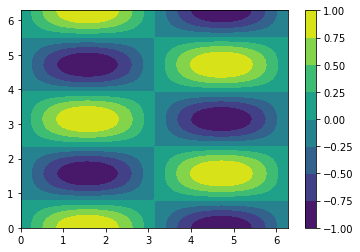

In [24]:
plt.contourf(xx, yy, z)
plt.colorbar();

If you're doing either of these kinds of plot, you *absolutely must* use a [colorbar](#colorbar) or something similar. More information about choosing colors and color maps is in the [relevant section](#colors) below.

Aside from working with colors, the most important tweak you're likely to make in these plots is setting either the number of levels or the actual values of the levels. Too many makes visually distracting moire patterns if you're doing contours...

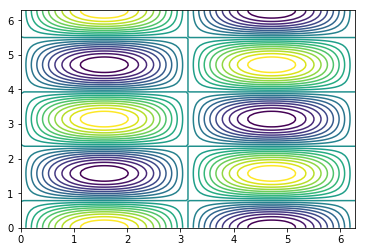

In [25]:
plt.contour(xx, yy, z, 20);

... but makes filled contour plots look very smooth. 

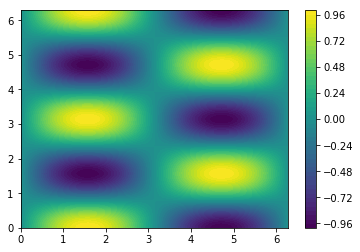

In [26]:
plt.contourf(xx, yy, z, 50)
plt.colorbar();

Too few contours, on the other hand, could make it hard to see fine details.

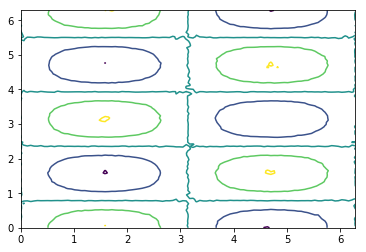

In [27]:
noise2d = 0.01*np.random.randn(z.shape[0], z.shape[1])

noize = z + noise2d
plt.contour(xx, yy, noize, 4);

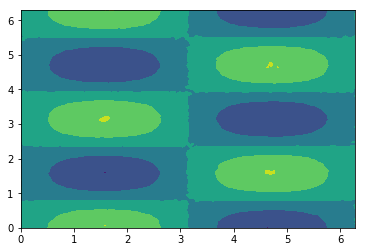

In [28]:
plt.contourf(xx, yy, noize, 4);

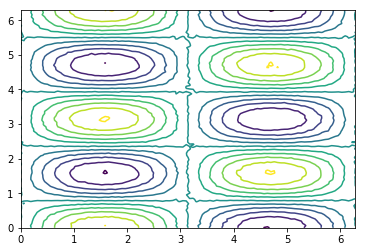

In [29]:
plt.contour(xx, yy, noize, 10);

How many contours you choose and whether or not you fill depends both on your data and on whether you want to emphasise or deemphasize small variations.

## E. Surface

These are actually 3d plots, and must be treated a little differently. I'm going to hold off on talking about them for now.

## F. Quiver
For vector fields. These generally require a fair amount of tweaking to look good. The most important thing is the number of arrows: enough to show the features you want to see, but not so many that the plot gets too busy. One approach is to generate your data field at a high resolution, and then downsample for the plot. In this example, I'm taking every fifth point in both x and y.

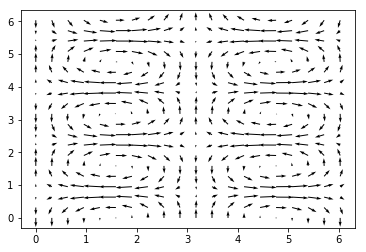

In [29]:
# interpret the z we used before as a stream function
u = -2*np.sin(xx)*np.sin(2*yy)
v = -np.cos(xx)*np.cos(2*yy)

plt.quiver(xx[::5,::5], yy[::5,::5], u[::5,::5], v[::5,::5])

A quiverkey adds a legend to the arrows. 

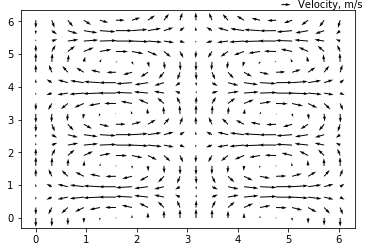

In [30]:
Q = plt.quiver(xx[::5,::5], yy[::5,::5], u[::5,::5], v[::5,::5])
plt.quiverkey(Q, 0.75, 0.9, 1, label="Velocity, m/s", coordinates='figure', labelpos='E');

Quiver plots are complicated, and have a lot of options. I'll expand this section later.

## G. Exotics  (via seaborn)
`seaborn` is a wrapper for `matplotlib` intended mostly for the creation of statistical graphics. It has two main features: it contains some more specialized/complicated plots than vanilla matplotlib, and it makes some stylistic choices (originally based on the `ggplot` package in R). With the addition of stylesheets to `matplotlib` in version 1.5, the stylistic choices are available even without using `seaborn`, but to get the plots without using `seaborn` requires a lot of work.

For now, this section serves as a placeholder with links to the `seaborn` documentation.

To use seaborn, you have to import it. The standard practice is to call it `sns`. Since importing it changes default styles, I'm not actually going to do that here.

In [31]:
#import seaborn as sns

### 1D distributions: distplot <a id='distplot'> </a>
[Better histograms, KDE plots, and rug plots.](http://seaborn.pydata.org/examples/distplot_options.html)

### Comparing distributions: boxplot, violin plots
Boxplots, [with](http://seaborn.pydata.org/examples/horizontal_boxplot.html) or [without](http://seaborn.pydata.org/examples/grouped_boxplot.html) observations.

### 2D distributions: jointplot
Lots of options here:
* [hexbin](http://seaborn.pydata.org/examples/hexbin_marginals.html)
* [density](http://seaborn.pydata.org/examples/joint_kde.html)
* [heatmap](http://seaborn.pydata.org/examples/heatmap_annotation.html) (technically different, but thematically similar)
* [scatter](http://seaborn.pydata.org/examples/marginal_ticks.html) (also)

### Views of distributions of multiple features: facetgrid
This is for looking for possible correlations between multiple features. [Pairgrid](http://seaborn.pydata.org/examples/pair_grid_with_kde.html)

# II. Necessary Annotations
-----

There are a few annotations that all plots need if you're going to show them to anyone other than yourself. Those are covered in this section.

## A. Title

What are we looking at?

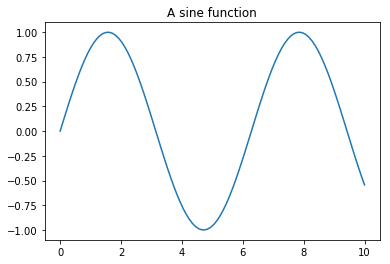

In [32]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x,y)
title = plt.title("A sine function")

## B. Axis labels

Should also include units, if relevant.

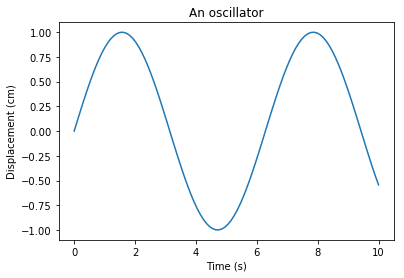

In [33]:
plt.plot(x,y)
title = plt.title("An oscillator")
xlab = plt.xlabel("Time (s)")
ylab = plt.ylabel("Displacement (cm)")

## C. Color bars <a id="colorbar"> </a>

You shouldn't have to tweak the options much, if at all.

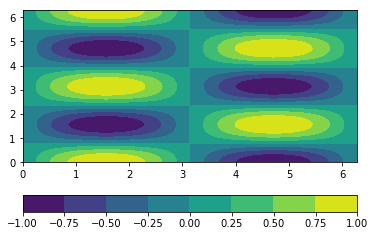

In [34]:
plt.contourf(xx, yy, z)
plt.colorbar(orientation='horizontal');

## D. Error bars <a id="Errorbars"> </a>

Any measured data (or quantities calculated from measured data) should have error bars indicating uncertainties. You can apply error bars in the $x$ direction, the $y$ direction, or both. You can also make them a fixed quantity, or have them depend on the value.

If you want to use errorbars, the `plt.errorbar` function can plot your data, as well, saving you a call to `plt.plot` or `plt.scatter`. Of course, if you're using the color or size features of `plt.scatter`, you'll want to use both.

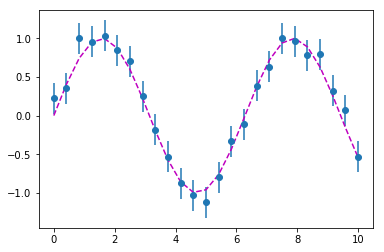

In [35]:
npoints = 25
x = np.linspace(0, 10, npoints)
noise = 0.1*np.random.randn(npoints)
y = np.sin(x) + noise

ax = plt.errorbar(x, y, yerr=0.2, fmt="o")
plt.plot(x, np.sin(x), 'm--');

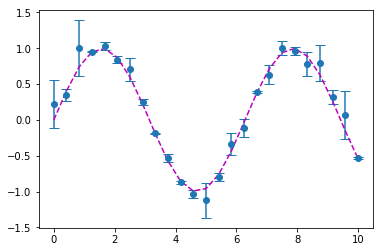

In [36]:
yerror = noise*1.5
ax = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5)
plt.plot(x, np.sin(x), 'm--');

## F. Legends

When you have multiple sources of data on a single graph, you need to make it clear what each of them is. For example, in the last section we plotted some measured data and a model for that data.  Legends are the easiest way to attach labels to the different data sources.

The steps:
* give a label to each plot you want to appear in the legend
* call `plt.legend()`

By default, it will choose a location for the legend that it thinks will interfere least with the visibility of your data, but it isn't always as smart as I'd like it to be. You can give it some help with the `loc` keyword.

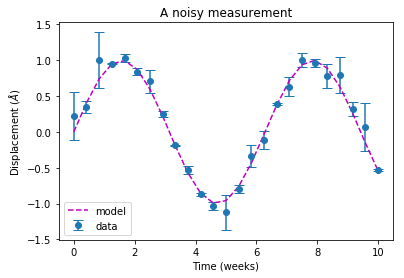

In [37]:
ax = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5, label='data')
plt.plot(x, np.sin(x), 'm--', label='model')
plt.title("A noisy measurement")
plt.ylabel('Displacement ($\AA$)')
plt.xlabel('Time (weeks)')
leg = plt.legend(loc='lower left')

In many circumstances, I actually prefer to hang my legends on the outside of the plot.

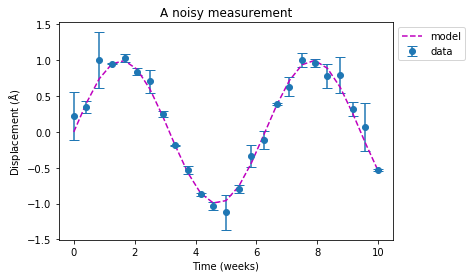

In [38]:
ax = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5, label='data')
plt.plot(x, np.sin(x), 'm--', label='model')
plt.title("A noisy measurement")
plt.ylabel('Displacement ($\mathrm{\AA}$)')
plt.xlabel('Time (weeks)')
leg = plt.legend(loc='upper left')
leg.set_bbox_to_anchor((1,1))

# III. Styling

## A. Predefined styles

As of version 1.5, `matplotlib` makes it easy to apply uniform styling to your plots. In addition, there are a number of predefined styles that are included. You can see the complete list of available predefined styles via

In [39]:
print(plt.style.available)

['seaborn-deep', 'seaborn-bright', 'fivethirtyeight', 'classic', 'seaborn-notebook', 'seaborn-talk', 'seaborn-dark', 'ggplot', 'seaborn', 'seaborn-white', 'grayscale', 'seaborn-colorblind', 'seaborn-poster', 'bmh', 'dark_background', 'seaborn-darkgrid', 'seaborn-ticks', 'seaborn-paper', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-muted', 'seaborn-whitegrid']


You can make a style active with the command

In [40]:
# ggplot is a popular plotting library in R
plt.style.use('ggplot')

Note that this changes the style for all future plots (until you restart the kernel).

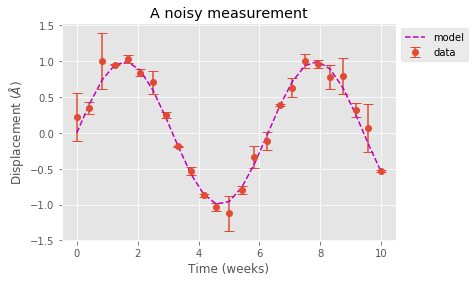

In [41]:
ax = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5, label='data')
plt.plot(x, np.sin(x), 'm--', label='model')
plt.title("A noisy measurement")
plt.ylabel('Displacement ($\AA$)')
plt.xlabel('Time (weeks)')
leg = plt.legend(loc='upper left')
leg.set_bbox_to_anchor((1,1))

Alternatively, if you just want to apply a style to one particular plot, you can use a context manager:

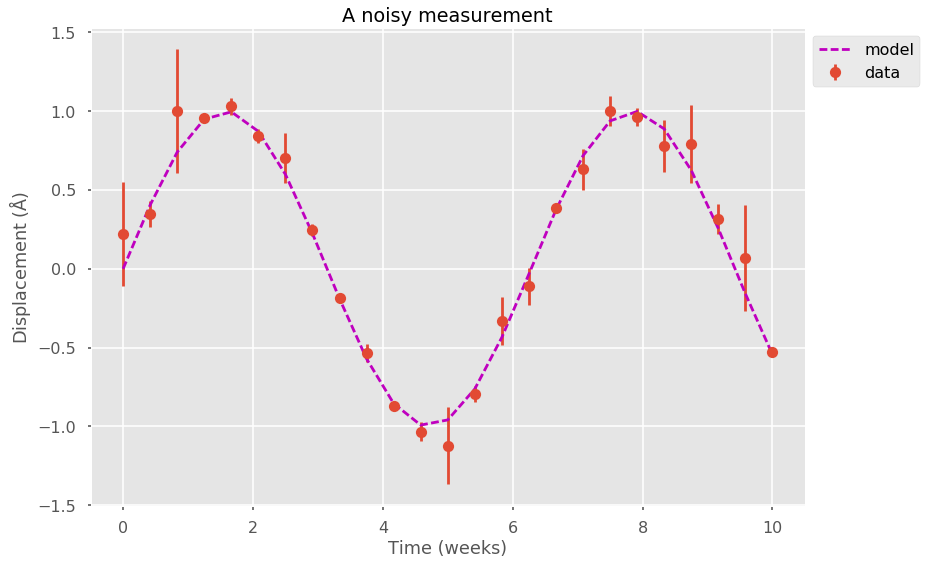

In [42]:
with plt.style.context(('seaborn-poster')):
    ax = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5, label='data')
    plt.plot(x, np.sin(x), 'm--', label='model')
    plt.title("A noisy measurement")
    plt.ylabel('Displacement ($\mathrm{\AA}$)')
    plt.xlabel('Time (weeks)')
    # upper left refers to the handle on the legend...
    leg = plt.legend(loc='upper left')
    #...which we anchor to (1,1) in figure coordinates
    leg.set_bbox_to_anchor((1,1))

Note that most styles don't change every parameter; the `ggplot` style changed the default first color for the data to red, and the `seaborn-poster` style didn't change this back to blue.

## Colors, colormaps, color palettes <a id="colors"> </a>

These three concepts are related, so I'm treating them together, but it's important to note that they apply in different circumstances: 
1. Most plot elements will allow you to specify a color. I refer to these as *individual colors* below.
2. When color is used to indicate a value (as in the contour or filled contour plots above), the appropriate idea is a *colormap*.
3. When color is used to distinguish between items without any particular ordering, (as in different data sets on a multi-line plot), the appropriate idea is a *color palette*.

I should note here that the distinction I'm making here between colormaps and color palettes is not universal (or perhaps even popular) --- `matplotlib` only uses the term colormap, and `seaborn` refers to both as color palettes. I think having a distinction between categorical and ordered color schemes is useful, but your mileage may vary.


There are a number of colormaps included with `matplotlib`, and it's also possible to make your own (though I wouldn't advise it unless you have a compelling, specific need and a good eye for design).

Since individual colors are at the root of all of these choices, we'll start there.

### Individual colors
You can specify individual colors in a variety of ways:
* A letter code for the standard primary and secondary colors (rgbcmykw)
* A name from the [X11 color names list](https://en.wikipedia.org/wiki/X11_color_names)
* A hex code (as in html -- "#aa2489")
* A tuple containing (R,B,G,A) (where A is for alpha, or transparency; values are between 0 and 1)
* A single float value between 0 and 1 for a gray level

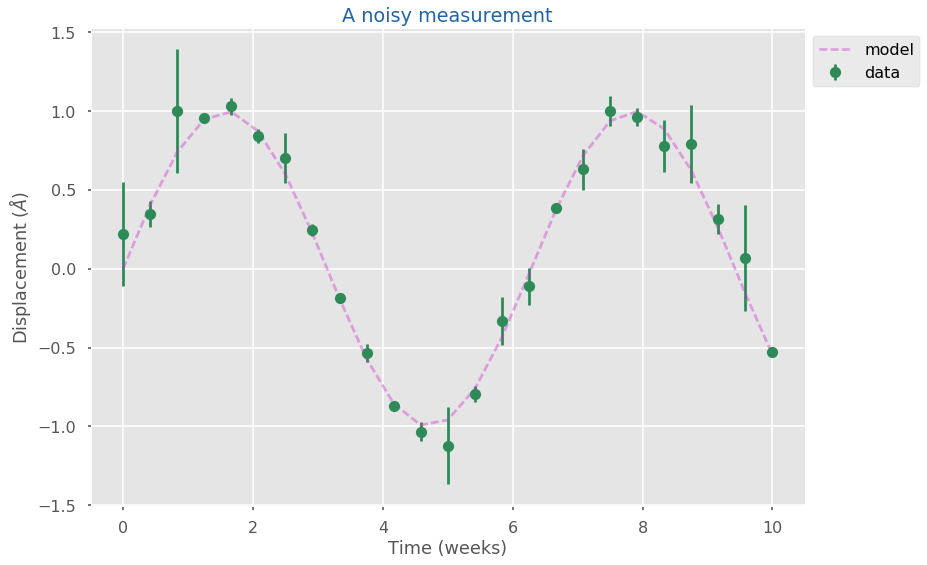

In [43]:
with plt.style.context(('seaborn-poster')):
    ax = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5, label='data', color='seagreen')
    plt.plot(x, np.sin(x), '--', label='model', color=(0.8, 0.2, 0.8, 0.4))
    plt.title("A noisy measurement", color="#2264a9")
    plt.ylabel('Displacement ($\AA$)')
    plt.xlabel('Time (weeks)')
    # upper left refers to the handle on the legend...
    leg = plt.legend(loc='upper left')
    #...which we anchor to (1,1) in figure coordinates
    leg.set_bbox_to_anchor((1,1))

### Colormaps

The list of colormaps is long, and is best represented [visually](http://matplotlib.org/users/colormaps.html). There is actually a lot of theory behind the choice of the right colormap, depending on what you're trying to represent, but I won't go into that here. To apply a specific colormap to a contour or filled contour plot, just include its name as an argument.

For data with both positive and negative values (if sign matters), it's a good idea to use a diverging map like `BrBG` or `RdBu_r`.

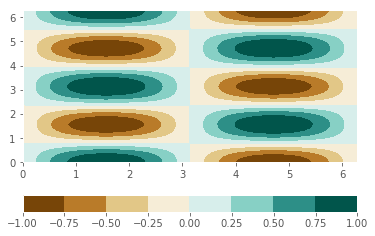

In [44]:
# looks more cartographic
plt.contourf(xx, yy, z, cmap='BrBG')
plt.colorbar(orientation='horizontal');

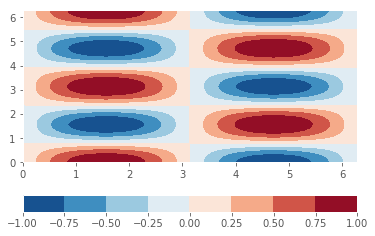

In [45]:
# traditional reds and blues
plt.contourf(xx, yy, z, cmap='RdBu_r')
plt.colorbar(orientation='horizontal');

Data that is single sided (for example, if you're using color to indicate the magnitue of a vector on a quiver plot) should use a sequential color map like `Blues`.

Much more information is available [here](http://seaborn.pydata.org/tutorial/color_palettes.html) and in the included links.

# IV. Refinements <a id='Refinements'> </a>

## Incorporating $\LaTeX$ or other symbols

Any `matplotlib` function that takes text (titles, labels, etc.) can render LaTeX for math or other symbols. The process:
* Enclose the desired part of your text in dollar signs.
* if you're using double quote marks, make sure you prefix the string with `r` (see below)
* `r` is not necessary if you're using single quote marks

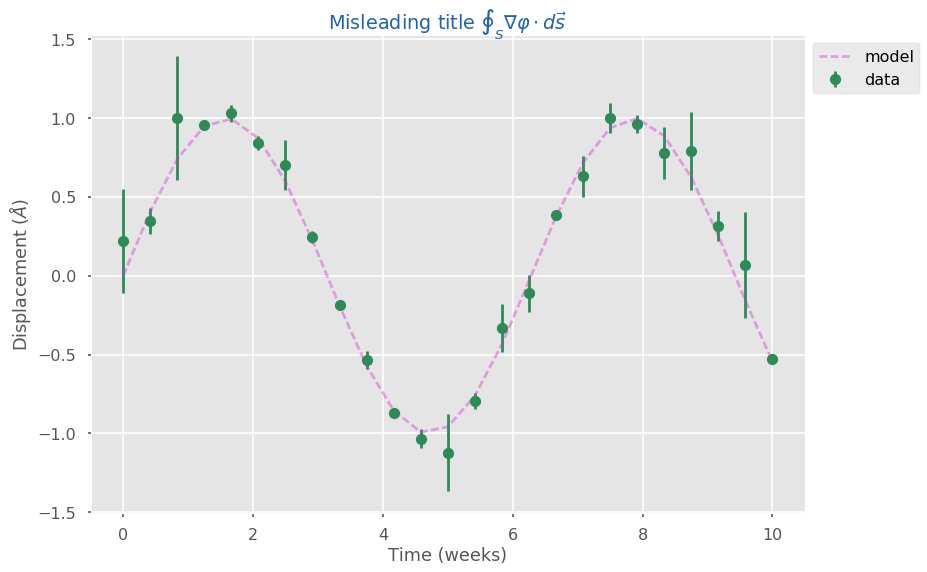

In [46]:
with plt.style.context(('seaborn-poster')):
    ax = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5, label='data', color='seagreen')
    plt.plot(x, np.sin(x), '--', label='model', color=(0.8, 0.2, 0.8, 0.4))
    # note the r
    title = plt.title(r"Misleading title $\oint_S \nabla\varphi\cdot d\vec{s} $", color="#2264a9")
    # no r here because single quotes
    ylabel = plt.ylabel('Displacement ($\AA$)')
    xlabel = plt.xlabel('Time (weeks)')
    # upper left refers to the handle on the legend...
    leg = plt.legend(loc='upper left')
    #...which we anchor to (1,1) in figure coordinates
    leg.set_bbox_to_anchor((1,1))

## Font size (and typefaces)

Size is a much easier thing to deal with than typeface or other font properties, so we'll start there. Changing the size of a plot element that you add by hand (a title or label, for example) is as simple as including a `fontsize` argument.

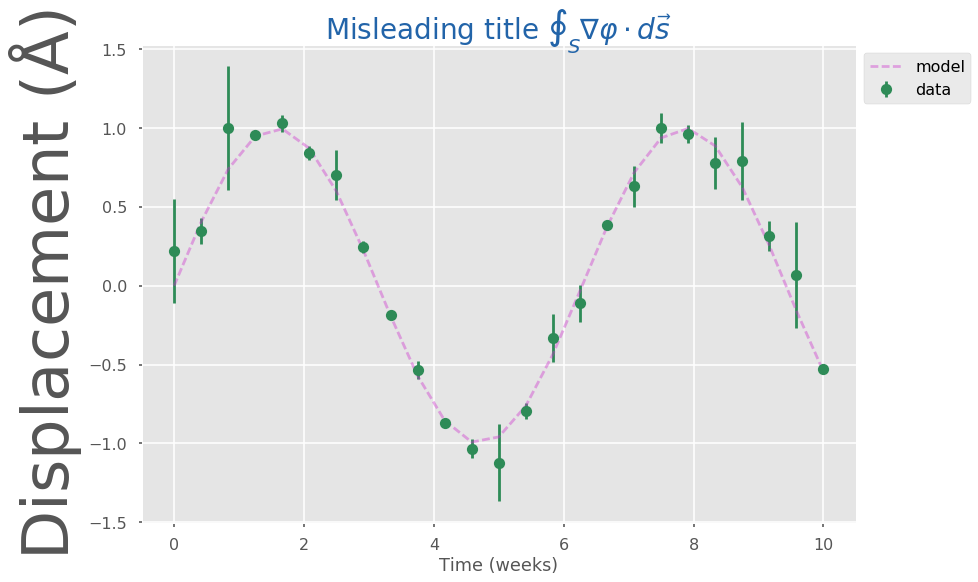

In [47]:
with plt.style.context(('seaborn-poster')):
    ax = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5, label='data', color='seagreen')
    plt.plot(x, np.sin(x), '--', label='model', color=(0.8, 0.2, 0.8, 0.4))
    
    # note the r, bigger than normal
    title = plt.title(r"Misleading title $\oint_S \nabla\varphi\cdot d\vec{s} $", color="#2264a9", fontsize=28)
    
    # no r here because single quotes, also make it really big
    ylabel = plt.ylabel('Displacement ($\mathrm{\AA}$)', fontsize=64)
    
    xlabel = plt.xlabel('Time (weeks)')
    # upper left refers to the handle on the legend...
    leg = plt.legend(loc='upper left')
    #...which we anchor to (1,1) in figure coordinates
    leg.set_bbox_to_anchor((1,1))

If you want to see how big a font is (for example, in this case, I'm curious about the default size for the x axis label), you can request it *if you assigned the output of the call to some variable*. Other font properties (such as family, style, etc.) are also available.

In [48]:
# xlabel was assigned when I made the plot above.
xlabel.get_fontsize()

17.6

If you want to change the size of something that is automatically provided (such as the tick labels), you'll have to access it directly.

## Ticks and ticklabels

The simplest (though not only) way to modify the tick labels is to use the `tick_params` function. For example, here we change the font size.

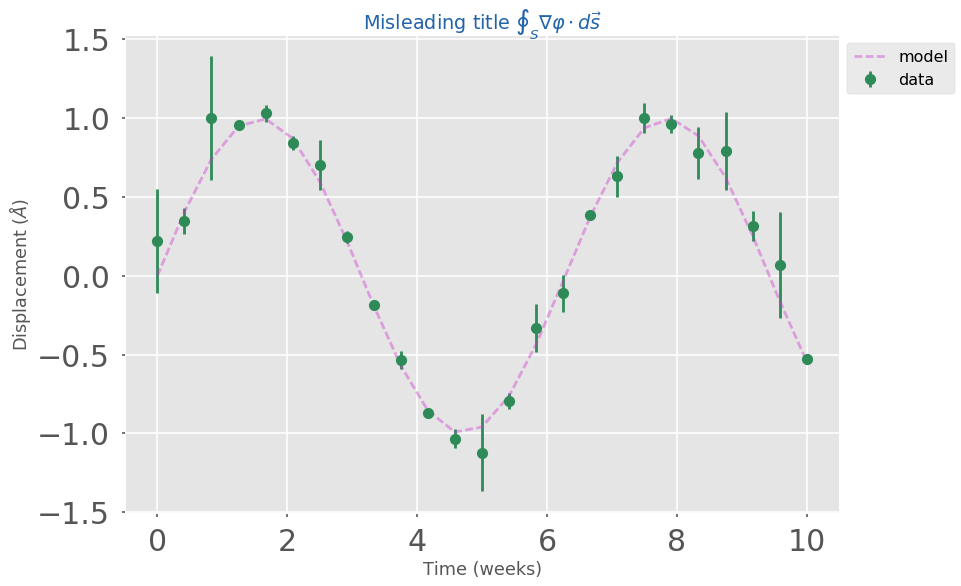

In [49]:
with plt.style.context(('seaborn-poster')):
    eb = plt.errorbar(x, y, yerr=yerror, fmt="o", capsize=5, label='data', color='seagreen')
    lineplot = plt.plot(x, np.sin(x), '--', label='model', color=(0.8, 0.2, 0.8, 0.4))
    
    # getting the Axes object. There's an easier way to do this if we start the figure differently
    ax = lineplot[0].axes
    # set the tick parameters
    ax.tick_params(axis='both', labelsize=30)
    
    
    # note the r
    title = plt.title(r"Misleading title $\oint_S \nabla\varphi\cdot d\vec{s} $", color="#2264a9")
    # no r here because single quotes
    ylabel = plt.ylabel('Displacement ($\AA$)')
    xlabel = plt.xlabel('Time (weeks)')
    # upper left refers to the handle on the legend...
    leg = plt.legend(loc='upper left')
    #...which we anchor to (1,1) in figure coordinates
    leg.set_bbox_to_anchor((1,1))

In [50]:
help(ax.tick_params)

Help on method tick_params in module matplotlib.axes._base:

tick_params(axis='both', **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Change the appearance of ticks and tick labels.
    
    Parameters
    ----------
    axis : {'x', 'y', 'both'}, optional
        Which axis to apply the parameters to.
    
    Other Parameters
    ----------------
    
    axis : {'x', 'y', 'both'}
        Axis on which to operate; default is 'both'.
    
    reset : bool
        If *True*, set all parameters to defaults
        before processing other keyword arguments.  Default is
        *False*.
    
    which : {'major', 'minor', 'both'}
        Default is 'major'; apply arguments to *which* ticks.
    
    direction : {'in', 'out', 'inout'}
        Puts ticks inside the axes, outside the axes, or both.
    
    length : float
        Tick length in points.
    
    width : float
        Tick width in points.
    
    color : color
        Tick color; accepts any mpl color 

## z-ordering

## Grids

## Text annotations

## Quiverkey

# V. Complete examples

# VI. Saving your work
If you might resize your figure later, use a vector format (pdf or svg). For the web, png is sort of standard (though svg should also work in all but the oldest browsers). One rule of thumb: if your final product will be printed, use pdf; if it's going to be viewed on a screen, use svg---though at this point in history, it doesn't really matter all that much.

In [51]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Arguments:
    
      *fname*:
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, remember to specify *format* to
        ensur